In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
!pip install opendatasets -q

In [3]:
import opendatasets as od
#{"username":"khwrali","key":"a2b23dfbac2443ab4db34e48318ce4ff"}
od.download("https://www.kaggle.com/datasets/karthickveerakumar/spam-filter")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khwrali
Your Kaggle Key: ··········


100%|██████████| 2.86M/2.86M [00:00<00:00, 50.4MB/s]

In [4]:
data=pd.read_csv('/content/spam-filter/emails.csv')
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


#Pre-processing

In [5]:
print(data.isnull().sum())
#Checking number of spam and non_spam mails
print(data['spam'].value_counts())

text    0
spam    0
dtype: int64
0    4360
1    1368
Name: spam, dtype: int64


# Feature Engineering


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
vector.fit_transform(data.text)

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

### Define X and Y

In [7]:
X = vector.fit_transform(data.text)
Y = data.spam.values

# Division of data in training and testing set

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=101)

# Model 1 - Gaussian Naive Bayes - using training and testing split

In [9]:
from sklearn.naive_bayes import GaussianNB
mnb1 = GaussianNB()
model1 = mnb1.fit(xtrain.toarray(),ytrain)
tr_pred = model1.predict(xtrain.toarray())
ts_pred = model1.predict(xtest.toarray())

In [10]:
from sklearn.metrics import classification_report
print("\n=========Training==========")
print(classification_report(ytrain,tr_pred))
print("=========Testing==========")
print(classification_report(ytest,ts_pred))


=========Training==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3046
           1       0.99      1.00      0.99       963

    accuracy                           1.00      4009
   macro avg       0.99      1.00      1.00      4009
weighted avg       1.00      1.00      1.00      4009

=========Testing==========
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1314
           1       0.97      0.90      0.93       405

    accuracy                           0.97      1719
   macro avg       0.97      0.94      0.96      1719
weighted avg       0.97      0.97      0.97      1719



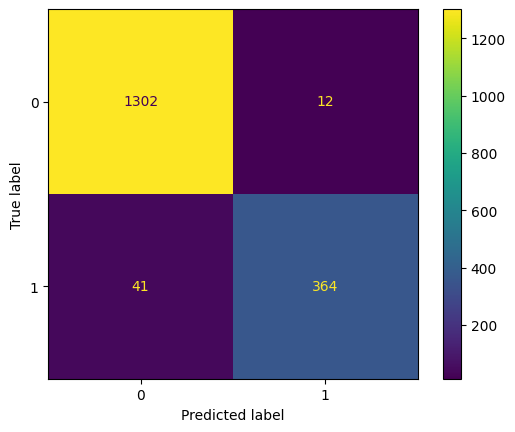

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ts_pred, labels=mnb1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb1.classes_)
disp.plot()

In [12]:
from sklearn.metrics import accuracy_score
print("=========Accuracy==========")
print(f"{accuracy_score(ytest, ts_pred)*100:.2f}%")

=========Accuracy==========
96.92%


# Model 2 - Multinomial Naive Bayes - using training and testing split

In [13]:
from sklearn.naive_bayes import MultinomialNB
mnb2 = MultinomialNB()
model2 = mnb2.fit(xtrain,ytrain)
tr_pred = model2.predict(xtrain)
ts_pred = model2.predict(xtest)

In [14]:
from sklearn.metrics import classification_report
print("\n=========Training==========")
print(classification_report(ytrain,tr_pred))
print("=========Testing==========")
print(classification_report(ytest,ts_pred))


=========Training==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3046
           1       0.99      1.00      1.00       963

    accuracy                           1.00      4009
   macro avg       1.00      1.00      1.00      4009
weighted avg       1.00      1.00      1.00      4009

=========Testing==========
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1314
           1       0.97      1.00      0.98       405

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



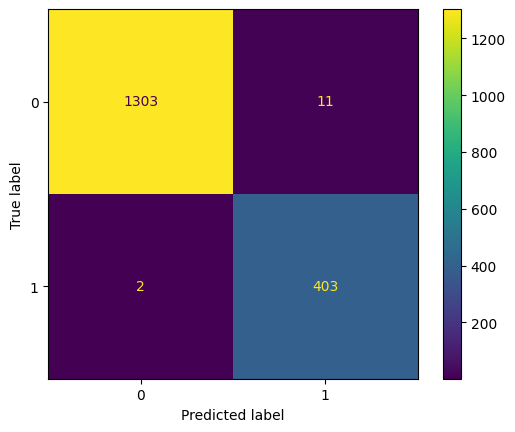

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ts_pred, labels=mnb2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb2.classes_)
disp.plot()

In [16]:
from sklearn.metrics import accuracy_score
print("=========Accuracy==========")
print(f"{accuracy_score(ytest, ts_pred)*100:.2f}%")

=========Accuracy==========
99.24%


# Model 3 - Decision Tree Classifier - using training and testing split

In [17]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(xtrain,ytrain)
tr_pred=model3.predict(xtrain)
ts_pred=model3.predict(xtest)

In [18]:
from sklearn.metrics import classification_report
print("\n=========Training==========")
print(classification_report(ytrain,tr_pred))
print("=========Testing==========")
print(classification_report(ytest,ts_pred))


=========Training==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3046
           1       1.00      1.00      1.00       963

    accuracy                           1.00      4009
   macro avg       1.00      1.00      1.00      4009
weighted avg       1.00      1.00      1.00      4009

=========Testing==========
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1314
           1       0.88      0.94      0.91       405

    accuracy                           0.96      1719
   macro avg       0.93      0.95      0.94      1719
weighted avg       0.96      0.96      0.96      1719



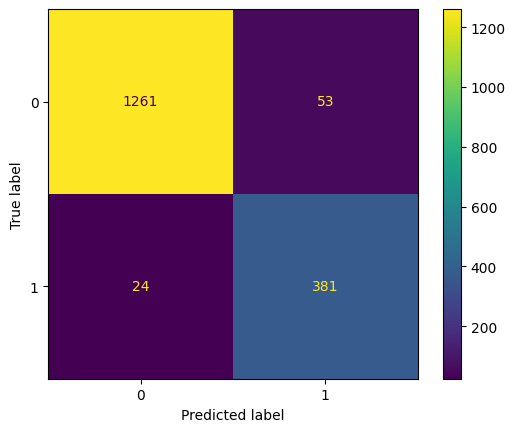

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, ts_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot()

In [20]:
from sklearn.metrics import accuracy_score
print("=========Accuracy==========")
print(f"{accuracy_score(ytest, ts_pred)*100:.2f}%")

=========Accuracy==========
95.52%


#Conclusion

##In conclusion, the email spam detection models were evaluated, and the following accuracy scores were obtained:

###(1) Gaussian Naive Bayes: 96.92%
###(2) Multinomial Naive Bayes: 99.24%
###(3) Decision Tree Classifier: 95.52%

##The Multinomial Naive Bayes model demonstrated the highest accuracy at 99.24%, making it the most effective among the models tested.